In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
# https://www.kaggle.com/code/fuzzywizard/rec-sys-collaborative-filtering-dl-techniques

C:\Users\system 4\AppData\Local\Temp\ipykernel_11464\1035269855.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering
df = pd.read_csv('Feats45_unCateg_APPRDX.csv')
df.shape
df.head(2)

Z:\PPMI_Data\Excels\CollaborativeFiltering


,PATNO,APPRDX,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,3002,1,1,1,0,12.16,7,1,1,1,...,57,1,0,45,59,47.5,110,204,17,1
1,3010,1,2,1,1,7.76,6,1,1,0,...,36,1,3,40,39,52.0,27,52,9,0


In [3]:
# Removing a column
df1 = df.drop('PATNO', axis = 1)
df1.head(2)

,APPRDX,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1,1,1,0,12.16,7,1,1,1,1,...,57,1,0,45,59,47.5,110,204,17,1
1,1,2,1,1,7.76,6,1,1,0,0,...,36,1,3,40,39,52.0,27,52,9,0


In [4]:
df2 = pd.read_csv('NonMotor_Empty.csv')
df2.shape
df2.head(2)

,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Removing a column
df3 = df2.drop('Patient_ID', axis = 1)
df3.head(2)

,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,Education,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Function to update values in the dataframe based on user inputs
def update_values(df3):
    # Inputs from the user
    column1 = input("Enter the name of the first Feature: ")
    value1 = input("Enter the value to update for the first Feature: ")
    column2 = input("Enter the name of the second Feature: ")
    value2 = input("Enter the value to update for the second Feature: ")
    column3 = input("Enter the name of the third Feature: ")
    value3 = input("Enter the value to update for the third Feature: ")

    # Convert the input values to the appropriate data type
    value1 = int(value1)
    value2 = int(value2)
    value3 = int(value3)

    # Update the values in the dataframe
    df3.loc[df[column1]!= value1, column1] = value1
    df3.loc[df[column2]!= value2, column2] = value2
    df3.loc[df[column3]!= value3, column3] = value3

    
    return df3

# Call the function
df3 = update_values(df3)

# Print the updated dataframe
df3.head()

Enter the name of the first Feature: UPSIT
Enter the value to update for the first Feature: 22
Enter the name of the second Feature: Clock
Enter the value to update for the second Feature: 2
Enter the name of the third Feature: Benton
Enter the value to update for the third Feature: 2


,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,Education,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN


In [7]:
# Adding back the column (as the first column)
df3.insert (0, 'Patient_ID', df2['Patient_ID'])
df3.head()

,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,999,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN


In [8]:
# merging two dataframes [original and our input dataframes]
merged_df = pd.concat ([df1, df3], axis = 0)
merged_df.reset_index(inplace = True)
merged_df.tail()

,index,APPRDX,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
246,246,2.0,247,0.0,0.0,14.77,6.0,0.0,1.0,3.0,...,47.0,0.0,0.0,46.0,44.0,56.250000,27.0,75.0,36.0,0.0
247,247,2.0,248,0.0,0.0,14.18,6.0,0.0,1.0,0.0,...,58.0,1.0,3.0,47.0,40.0,58.750000,28.0,48.0,38.0,1.0
248,248,2.0,249,0.0,0.0,11.06,7.0,0.0,1.0,0.0,...,49.0,2.0,1.0,45.0,46.0,45.830002,36.0,106.0,32.0,1.0
249,249,2.0,250,0.0,0.0,11.06,7.0,0.0,1.0,0.0,...,57.0,0.0,3.0,44.0,45.0,50.000000,30.0,80.0,38.0,0.0
250,0,NaN,999,NaN,NaN,2.00,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN


In [9]:
# dropping a few columns
merged_df1 = merged_df.drop(['index','Patient_ID'], axis = 1)
merged_df1.head(2)


,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1.0,1.0,0.0,12.16,7.0,1.0,1.0,1.0,1.0,0.0,...,57.0,1.0,0.0,45.0,59.0,47.5,110.0,204.0,17.0,1.0
1,1.0,1.0,1.0,7.76,6.0,1.0,1.0,0.0,0.0,0.0,...,36.0,1.0,3.0,40.0,39.0,52.0,27.0,52.0,9.0,0.0


In [10]:
# scaling values of every column from 1 to 5 [column wise]
scaler = MinMaxScaler (feature_range = (1,5))
df_scaled = scaler.fit_transform(merged_df1)
df_scaled = pd.DataFrame (df_scaled, columns = merged_df1.columns)
df_scaled.head(2)

,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1.0,2.333333,1.0,3.826147,5.000000,3.0,1.0,2.333333,2.0,1.0,...,3.285714,3.0,1.0,3.434783,5.0,2.833333,3.832117,3.686131,2.333333,2.0
1,1.0,2.333333,3.0,2.602225,4.333333,3.0,1.0,1.000000,1.0,1.0,...,1.785714,3.0,4.0,2.565217,3.0,3.133333,1.408759,1.467153,1.363636,1.0


In [11]:
# adding the column [as the first column]
df_scaled.insert (0, 'Patient_ID', merged_df['Patient_ID'], True)
df_scaled.head(3)

,Patient_ID,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1,1.0,2.333333,1.0,3.826147,5.000000,3.0,1.0,2.333333,2.0,...,3.285714,3.0,1.0,3.434783,5.0,2.833333,3.832117,3.686131,2.333333,2.0
1,2,1.0,2.333333,3.0,2.602225,4.333333,3.0,1.0,1.000000,1.0,...,1.785714,3.0,4.0,2.565217,3.0,3.133333,1.408759,1.467153,1.363636,1.0
2,3,1.0,1.000000,1.0,4.196106,5.000000,3.0,5.0,1.000000,1.0,...,2.428571,3.0,3.0,2.913043,3.3,2.555333,3.248175,4.386861,3.424242,1.0


In [12]:
df_scaled.tail(3)

,Patient_ID,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
248,249,5.0,1.0,1.0,3.520167,5.000000,1.0,1.0,1.0,1.0,...,2.714286,5.0,2.0,3.434783,3.7,2.722,1.671533,2.255474,4.151515,2.0
249,250,5.0,1.0,1.0,3.520167,5.000000,1.0,1.0,1.0,2.0,...,3.285714,1.0,4.0,3.260870,3.6,3.000,1.496350,1.875912,4.878788,1.0
250,999,NaN,NaN,NaN,1.000000,1.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.939394,NaN


In [13]:
# using melt function [reshape]
df_melted = df_scaled.melt(id_vars='Patient_ID', var_name='Feature', value_name='Value')
print(df_melted.shape)
df_melted.head(2)

(11546, 3)


,Patient_ID,Feature,Value
0,1,APPRDX,1.0
1,2,APPRDX,1.0


In [14]:
#1. take groupby with respect to Feature and get mean avg of each Feature. 
feat_rating_count = df_melted.groupby('Patient_ID')['Value'].count()

#2. convert into dataframe for better operation work.
feat_rating_count = pd.DataFrame(feat_rating_count)

#3. change column name.
feat_rating_count.columns = ['Value_count']

#4. create new column Patient_ID
feat_rating_count['Patient_ID'] = feat_rating_count.index
feat_rating_count = feat_rating_count.reset_index(drop=True)

In [15]:
#merging to Rating dataframe so we have collectively all information together..
dframe = df_melted.merge(feat_rating_count, on = 'Patient_ID', how = 'inner')
print(dframe.shape)
dframe.head(2)

(11546, 4)


,Patient_ID,Feature,Value,Value_count
0,1,APPRDX,1.000000,46
1,1,Anxiety,2.333333,46


In [16]:
#create a pivot matrix for user and Feature based on rating value..
RatingMat = dframe.pivot_table(index=['Patient_ID'],columns=['Feature'],values=['Value'],fill_value=0)

#keep a copy of original matrix for future refrence..
Original_RatingMat = RatingMat.copy()
RatingMat.head()

Value                                                          \
Feature    APPRDX   Anxiety Apathy    Benton COGSTATE     Clock Cognition   
Patient_ID                                                                  
1               1  2.333333      1  3.826147        1  5.000000         3   
2               1  2.333333      3  2.602225        1  4.333333         3   
3               1  1.000000      1  4.196106        5  5.000000         3   
4               1  1.000000      1  3.164117        5  4.333333         3   
5               1  2.333333      1  3.826147        1  5.000000         3   

                                         ...                            \
Feature    Constipate Depress DopaDefic  ...     STAIA STAIS  Semantic   
Patient_ID                               ...                             
1            2.333333       2         1  ...  3.434783   5.0  3.285714   
2            1.000000       1         1  ...  2.565217   3.0  1.785714   
3            1.000000       1         1  ...  2.913043   3.3  2.428571   
4            1.000000       1         1  ...  4.130435   3.8  2.714286   
5            1.000000       2         1  ...  3.956522   3.7  3.357143   

                                                                           \
Feature    SleepDay SleepNight Symbol_Digit Trail_Making_A Trail_Making_B   
Patient_ID                                                                  
1                 3          1     2.833333       3.832117       3.686131   
2                 3          4     3.133333       1.408759       1.467153   
3                 3          3     2.555333       3.248175       4.386861   
4                 3          3     2.500000       2.576642       3.116788   
5                 5          1     3.200000       1.817518       2.547445   

                            
Feature        UPSIT Urine  
Patient_ID                  
1           2.333333     2  
2           1.363636     1  
3           3.424242     1  
4           1.242424     2  
5           3.181818     1  

[5 rows x 46 columns]

In [17]:
#drop multilevel column for better usabiltity...
RatingMat.columns = RatingMat.columns.droplevel()
RatingMat.head(5)

Feature,APPRDX,Anxiety,Apathy,Benton,COGSTATE,Clock,Cognition,Constipate,Depress,DopaDefic,...,STAIA,STAIS,Semantic,SleepDay,SleepNight,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,1,2.333333,1,3.826147,1,5.000000,3,2.333333,2,1,...,3.434783,5.0,3.285714,3,1,2.833333,3.832117,3.686131,2.333333,2
2,1,2.333333,3,2.602225,1,4.333333,3,1.000000,1,1,...,2.565217,3.0,1.785714,3,4,3.133333,1.408759,1.467153,1.363636,1
3,1,1.000000,1,4.196106,5,5.000000,3,1.000000,1,1,...,2.913043,3.3,2.428571,3,3,2.555333,3.248175,4.386861,3.424242,1
4,1,1.000000,1,3.164117,5,4.333333,3,1.000000,1,1,...,4.130435,3.8,2.714286,3,3,2.500000,2.576642,3.116788,1.242424,2
5,1,2.333333,1,3.826147,1,5.000000,3,1.000000,2,1,...,3.956522,3.7,3.357143,5,1,3.200000,1.817518,2.547445,3.181818,1


In [18]:
#user wise similarity with cosine...
user_similarity = cosine_similarity(RatingMat)
user_sim_df = pd.DataFrame(user_similarity,index=RatingMat.index,columns=RatingMat.index)
user_sim_df.head(5)

#we can do it using pearson correlation as well there is no hard and fast rule.
# generally user-user approach we use pearson correlation and item-item we use cosine similarity


#user wise similarity with pearson coorelation...
# user_similarity = 1-pairwise_distances(RatingMat, metric="correlation")
# user_sim_df = pd.DataFrame(user_similarity,index=RatingMat.index,columns=RatingMat.index)
# user_sim_df.head(5)

Patient_ID,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,999
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.896083,0.939947,0.897746,0.914020,0.909887,0.897615,0.903830,0.903918,0.892045,...,0.838439,0.868919,0.832078,0.823903,0.875450,0.816358,0.852479,0.883752,0.837509,0.265653
2,0.896083,1.000000,0.908979,0.866806,0.858323,0.832349,0.921303,0.908269,0.924503,0.812929,...,0.803409,0.854226,0.770505,0.790741,0.853544,0.773138,0.854000,0.856702,0.824639,0.215162
3,0.939947,0.908979,1.000000,0.936861,0.879323,0.902250,0.913475,0.937106,0.909273,0.853982,...,0.828014,0.858789,0.799851,0.835749,0.913889,0.799953,0.863835,0.881892,0.846478,0.339569
4,0.897746,0.866806,0.936861,1.000000,0.878577,0.903319,0.883632,0.903345,0.869664,0.886005,...,0.843851,0.826551,0.812206,0.838431,0.888079,0.779111,0.872743,0.832048,0.865814,0.223723
5,0.914020,0.858323,0.879323,0.878577,1.000000,0.939996,0.853393,0.870393,0.901309,0.947460,...,0.858324,0.883185,0.830606,0.863760,0.900124,0.842018,0.896420,0.898247,0.876184,0.338542


In [19]:
# 1. select the user we have selected Patient_ID 999 
#Get a list of Feature user already watched so we can remove from our recommendation list..

current_user_rating = dframe[(dframe.Patient_ID == 999) & (dframe.Value != 0)]['Feature']
current_user_rating = pd.DataFrame(current_user_rating, columns=['Feature'])

In [20]:
# put similarity of current user i.e. 999 in a dataframe because later we need for weighted average..

curr_user_similarity = pd.DataFrame(user_sim_df.loc[999])

#just changing column name as similarity for better readability.
curr_user_similarity.rename(columns={999:'similarity'},inplace=True)
curr_user_similarity.sort_values(by='similarity', ascending=False, inplace=True)
curr_user_similarity1 = curr_user_similarity.iloc[1:, :]

# Reset index to move it to the first column
curr_user_similarity1.reset_index(inplace=True)

# Rename the index column
curr_user_similarity1.rename(columns={'index': 'Index_Column'}, inplace=True)

# Define a function to categorize values based on the condition
def categorize(x):
    if x < 165:
        return 'Patient'
    else:
        return 'Healthy'

# Apply the function to the first column of the dataframe
curr_user_similarity1['Patient_ID'] = curr_user_similarity1['Patient_ID'].apply(categorize)

# Show the resulting dataframe
curr_user_similarity1.head()


C:\Users\system 4\AppData\Local\Temp\ipykernel_11464\165802144.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_user_similarity1.rename(columns={'index': 'Index_Column'}, inplace=True)
C:\Users\system 4\AppData\Local\Temp\ipykernel_11464\165802144.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_user_similarity1['Patient_ID'] = curr_user_similarity1['Patient_ID'].apply(categorize)


,Patient_ID,similarity
0,Patient,0.488025
1,Patient,0.468625
2,Patient,0.467090
3,Patient,0.463292
4,Healthy,0.460363


The Patient_ID most similar to the input user is showing, from 5 we can decide patient or healthy based on 
more number of healthy or patient among those top 5 list generated above.

In [21]:
similar_user = curr_user_similarity1.iloc[:5, :]
counts = similar_user['Patient_ID'].value_counts()
most_occurring_value = counts.index[0]
print("The user might fall under category of", most_occurring_value)

The user might fall under category of Patient


#As per the user category healthy or PD, we will give values to other unfilled features by that user

In [22]:
# List of features rated & not rated by the user
dframe[dframe['Patient_ID'] == 999]

,Patient_ID,Feature,Value,Value_count
11500,999,APPRDX,NaN,3
11501,999,Anxiety,NaN,3
11502,999,Apathy,NaN,3
11503,999,Benton,1.000000,3
11504,999,Clock,1.666667,3
11505,999,Cognition,NaN,3
11506,999,COGSTATE,NaN,3
11507,999,Constipate,NaN,3
11508,999,Depress,NaN,3
11509,999,DopaDefic,NaN,3


In [23]:
# user1 has not rated other features
dframe[(dframe['Patient_ID'] == 999) & (dframe['Feature'] == 'COGSTATE') ] 


,Patient_ID,Feature,Value,Value_count
11506,999,COGSTATE,NaN,3


In [24]:
df_n_ratings = pd.DataFrame(df_melted.groupby('Feature')['Value'].mean())


In [25]:
df_n_ratings['Total Value'] = pd.DataFrame(df_melted.groupby('Feature')['Value'].count())
df_n_ratings.rename(columns = {'Value': 'mean Value'}, inplace=True)

In [26]:
df_n_ratings.sort_values('mean Value', ascending=False).head(10)


,mean Value,Total Value
Feature,,
Clock,4.490040,251
Montreal_Cognitive,4.281231,250
Hopkins_Recog,4.029463,250
Benton,3.941502,251
Hopkins,3.514182,250
STAIS,3.480800,250
UPSIT,3.467705,251
STAIA,3.299826,250
LetterNumber,3.061867,250


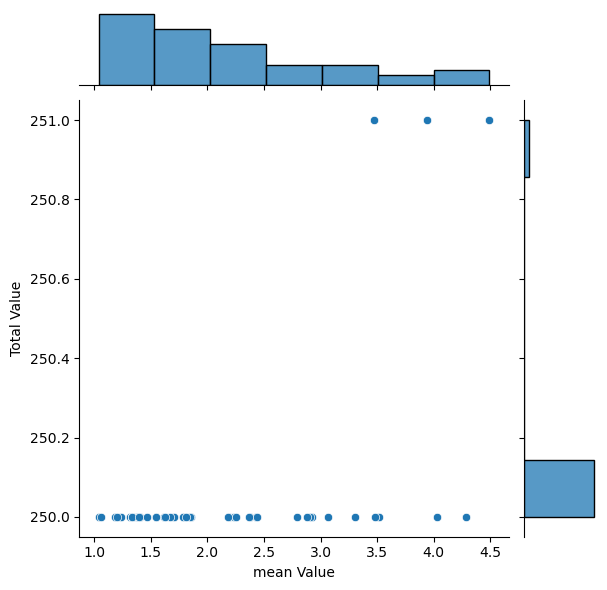

In [27]:
sns.jointplot(x = 'mean Value', y = 'Total Value', data = df_n_ratings )